# Математическая статистика

In [1]:
from statistics import multimode

import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
N = 14
print(f'Номер в группе {N}')

Номер в группе 14


**Задача.** Получение и визуализация выборки заданного <i><u>дискретного</u></i> распределения 

<i>Шаг 1.</i> 

Из списка дискретных случайных величин выберите случайные величины с номером $N$. 

In [3]:
variants = np.array([
    1, 4, 6, 7, 12, 27, 28, 29.5, 30, 31.9, 32, 
    39, 39.1, 39.2, 39.3, 39.4, 40, 41, 42, 50
])
freq = np.array([2, 3, 4, 5, 6, 7, 7, 5, 6, 7, 8, 10, 25, 1, 1, 1, 1, 1, 4, 1]) / 105

Визуализируем входные данные для наглядности распределения:

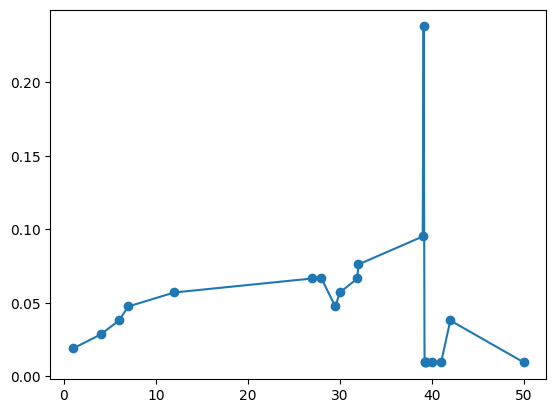

Случайная величина: Вероятностная мера


{1.0: 0.01904761904761905,
 4.0: 0.02857142857142857,
 6.0: 0.0380952380952381,
 7.0: 0.047619047619047616,
 12.0: 0.05714285714285714,
 27.0: 0.06666666666666667,
 28.0: 0.06666666666666667,
 29.5: 0.047619047619047616,
 30.0: 0.05714285714285714,
 31.9: 0.06666666666666667,
 32.0: 0.0761904761904762,
 39.0: 0.09523809523809523,
 39.1: 0.23809523809523808,
 39.2: 0.009523809523809525,
 39.3: 0.009523809523809525,
 39.4: 0.009523809523809525,
 40.0: 0.009523809523809525,
 41.0: 0.009523809523809525,
 42.0: 0.0380952380952381,
 50.0: 0.009523809523809525}

In [4]:
table = dict(zip(variants, freq))
plt.plot(variants, freq, '-o')
plt.show()

print('Случайная величина: Вероятностная мера')
table

<i>Шаг 2.</i>

Для данных случайных величин, создайте функцию распределения вашей случайной величины (если необходимо).

In [5]:
summary = sum(freq)

print(f'Сумма частот -{summary}, что не равно 1 из-за дискретности ЭВМ, поэтому выполняем нормализацию.')

freq_norm = list(map(lambda p: p / summary, freq))

print(f'Снова суммируем и получаем: {sum(freq_norm)}')

distribution = sps.rv_discrete(values = (variants, freq_norm))

Сумма частот -0.9999999999999997, что не равно 1 из-за дискретности ЭВМ, поэтому выполняем нормализацию.
Снова суммируем и получаем: 1.0


<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант

In [6]:
size = 100
sample = distribution.rvs(size = size)

In [7]:
sample

array([ 4. , 30. ,  6. , 39.3, 42. , 31.9, 32. , 31.9, 39.1, 50. , 28. ,
        7. , 12. , 39.1, 31.9, 39.1,  6. ,  7. , 28. , 40. , 32. , 30. ,
       39.1, 27. ,  1. , 12. ,  4. , 12. , 12. , 42. , 39.1, 32. , 32. ,
        7. ,  6. , 31.9, 39. , 42. , 39.1, 32. ,  6. , 32. , 39.1, 39. ,
       27. , 32. , 39.1,  4. ,  7. , 39. , 30. , 31.9, 39.2,  6. , 39.1,
        6. , 39.1,  4. , 32. ,  4. , 30. , 39.3, 40. , 50. ,  4. , 39.1,
       12. , 39.1,  7. , 39. , 39.1, 29.5, 12. ,  7. , 29.5, 39. , 42. ,
       29.5, 28. , 39.1, 29.5, 39.1, 28. , 39.1, 31.9, 39.1,  4. , 39.1,
       39.1, 32. , 30. , 27. , 32. , 39.1, 12. , 32. , 42. , 27. , 28. ,
       31.9])

In [8]:
variants

array([ 1. ,  4. ,  6. ,  7. , 12. , 27. , 28. , 29.5, 30. , 31.9, 32. ,
       39. , 39.1, 39.2, 39.3, 39.4, 40. , 41. , 42. , 50. ])

<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [9]:
from collections import Counter
from collections import OrderedDict

counter = Counter(sample)
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

variants = oredered.keys()
freq = oredered.values()

In [10]:
def find_median(array):
    middle = len(array) / 2.
    if (middle % 1 == 0):
        return (array[int(middle) + 1] + array[int(middle)]) / 2
    else:
        return array[int(middle)]

In [11]:
print('Объем выборки:', len(sample))
print('Минимум, максимум:', (min(sample), max(sample)))

avg = sum(sample) / size

def moment(n, length = size):
    return np.sum(list(map(lambda x: (x - avg) ** n, sample))) / length

print('Среднее:', avg)
print('Дисперсия:', moment(2, length = size - 1))
print('Размах:', max(sample) - min(sample))

print('Ассиметрия:', moment(3) / moment(2) ** (3 / 2))
print('Эксцесс:', moment(4) / (moment(2) ** 2) - 3)

print('II момент:', moment(2))
print('III момент:', moment(3))
print('IV момент:', moment(4))

print('Медиана:', find_median(list(sample)))
print('Мода:', multimode(list(sample)))

Объем выборки: 100
Минимум, максимум: (1.0, 50.0)
Среднее: 27.67099999999999
Дисперсия: 182.76430202020202
Размах: 49.0
Ассиметрия: -0.6934587342739759
Эксцесс: -0.9281147837640646
II момент: 180.936659
III момент: -1687.7591562779933
IV момент: 67829.53270978309
Медиана: 30.95
Мода: [39.1]


Получаем значения через функции из пакета Stats

In [12]:
obj = sps.describe(sample)

print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(sample, moment = 2))
print('III момент:', sps.moment(sample, moment = 3))
print('IV момент:', sps.moment(sample, moment = 4))

mode = sps.mode(sample, keepdims = False)

print(f'Мода: {mode.mode} количество: {mode.count}')

Объем выборки: 100
Минимум, максимум: (1.0, 50.0)
Среднее: 27.671000000000003
Дисперсия: 182.76430202020208
Ассиметрия: -0.6934587342739787
Эксцесс: -0.9281147837640638
II момент: 180.93665900000005
III момент: -1687.7591562780012
IV момент: 67829.53270978318
Мода: 39.1 количество: 20


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

In [13]:
counter

Counter({39.1: 20,
         32.0: 11,
         4.0: 7,
         31.9: 7,
         12.0: 7,
         6.0: 6,
         7.0: 6,
         30.0: 5,
         42.0: 5,
         28.0: 5,
         39.0: 5,
         27.0: 4,
         29.5: 4,
         39.3: 2,
         50.0: 2,
         40.0: 2,
         1.0: 1,
         39.2: 1})

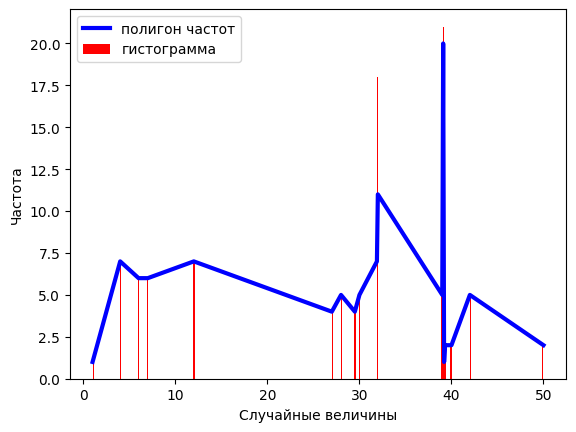

In [14]:
plt.figure()
plt.plot(variants, freq, color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(sample, 3 * size, color = 'red', label = 'гистограмма')
plt.legend()

plt.xlabel('Случайные величины')
plt.ylabel('Частота')

plt.show()

**Задача.** Получение и визуализация выборки заданного <i><u>непрерывного</u></i> распределения.

<i>Шаг 1.</i> 

Из списка непрерывных случйных величин выберите с номером $N$. 

In [15]:
μ = 2
σ_square = 5

print(f'Номер в группе {N}, X распределен по закону N({μ}, {σ_square})')

Номер в группе 14, X распределен по закону N(2, 5)


<i>Шаг 2.</i>

Для данных случайных величин, создайте функцию распределения вашей случайной величины (если необходимо).

In [16]:
normal = sps.norm.rvs(size = size, loc = μ, scale = np.sqrt(σ_square))
show_count = 12

print(f'Первые {show_count} значений выборки:\n', normal[:show_count])

Первые 12 значений выборки:
 [-0.97309812  3.03263715  1.99012208  1.78647872 -0.19610678  4.26802697
 -1.15436934  1.18711202  1.49640897  2.60083862  4.89905732  1.84808816]


<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант

In [17]:
counter = Counter(normal)
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

variants = oredered.keys()
freq = oredered.values()

print(f'Массив вариант: \n{variants}', '\n\n' , f'Массив частот: \n{freq}')

Массив вариант: 
odict_keys([-3.320424264549257, -2.6694883602017514, -2.6463652209558273, -2.4829501668603005, -2.1736498584176944, -2.087585973940067, -1.7667854839034756, -1.5730552070240504, -1.1543693351599535, -1.1480713545263663, -0.9926672655355797, -0.9730981190059844, -0.3956331721647044, -0.24944265325011772, -0.20845795314843185, -0.19610678062475762, -0.11658211351540082, -0.016598285794718226, 0.07600228613719962, 0.0839560247921256, 0.09311209995384084, 0.21080881515790262, 0.2779956404292758, 0.29085885818893153, 0.4556419235107181, 0.5383319547142666, 0.7628225363031558, 0.8175104106025506, 0.8493066776698004, 0.9415642580885122, 0.963392968407534, 1.100873875880231, 1.1871120187554647, 1.3077300373104928, 1.431809737517311, 1.4373602042314246, 1.4964089692427063, 1.5074543215123655, 1.5174725472265542, 1.5295494905920417, 1.5542786716465393, 1.6005494665756477, 1.6085176982860796, 1.6319789685218271, 1.7549523815983092, 1.7582288418640175, 1.7803436243647714, 1.786478

<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [18]:
print('Объем выборки:', len(normal))
print('Минимум, максимум:', (min(normal), max(normal)))

avg = sum(normal) / size

def moment(n, length = size):
    return np.sum(list(map(lambda x: (x - avg) ** n, normal))) / length

print('Среднее:', avg)
print('Дисперсия:', moment(2, length = size - 1))
print('Размах:', max(normal) - min(normal))

print('Ассиметрия:', moment(3) / moment(2) ** (3 / 2))
print('Эксцесс:', moment(4) / (moment(2) ** 2) - 3)

print('II момент:', moment(2))
print('III момент:', moment(3))
print('IV момент:', moment(4))

print('Медиана:', find_median(list(normal)))
print('Мода (ограничение на 3 значения):', multimode(list(normal))[:3])

Объем выборки: 100
Минимум, максимум: (-3.320424264549257, 9.289645325296618)
Среднее: 2.005994546872898
Дисперсия: 5.512967484312397
Размах: 12.610069589845875
Ассиметрия: 0.28883266033105115
Эксцесс: 0.558499028049074
II момент: 5.457837809469273
III момент: 3.682792404604969
IV момент: 106.00054611112196
Медиана: 2.9811741802836274
Мода (ограничение на 3 значения): [-0.9730981190059844, 3.0326371501823157, 1.9901220773259465]


Получаем значения через функции из пакета Stats

In [19]:
obj = sps.describe(normal)

print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(normal, moment = 2))
print('III момент:', sps.moment(normal, moment = 3))
print('IV момент:', sps.moment(normal, moment = 4))

mode = sps.mode(normal, keepdims = False)

print(f'Мода: {mode.mode} количество: {mode.count}')

Объем выборки: 100
Минимум, максимум: (-3.320424264549257, 9.289645325296618)
Среднее: 2.0059945468728984
Дисперсия: 5.512967484312398
Ассиметрия: 0.28883266033105054
Эксцесс: 0.558499028049074
II момент: 5.457837809469273
III момент: 3.6827924046049616
IV момент: 106.00054611112196
Мода: -3.320424264549257 количество: 1


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

In [20]:
counter

Counter({-0.9730981190059844: 1,
         3.0326371501823157: 1,
         1.9901220773259465: 1,
         1.7864787196567236: 1,
         -0.19610678062475762: 1,
         4.268026967301905: 1,
         -1.1543693351599535: 1,
         1.1871120187554647: 1,
         1.4964089692427063: 1,
         2.6008386161996238: 1,
         4.899057319429549: 1,
         1.8480881562919316: 1,
         4.246639336512044: 1,
         -1.1480713545263663: 1,
         3.0834211822330015: 1,
         0.2779956404292758: 1,
         1.7803436243647714: 1,
         4.354786421760581: 1,
         5.550449838422107: 1,
         4.071073467669377: 1,
         1.6319789685218271: 1,
         9.289645325296618: 1,
         0.0839560247921256: 1,
         0.963392968407534: 1,
         1.5074543215123655: 1,
         1.5295494905920417: 1,
         3.0419685571444663: 1,
         -2.1736498584176944: 1,
         2.964934145435532: 1,
         2.4081103808309536: 1,
         2.4402663168860697: 1,
         2.

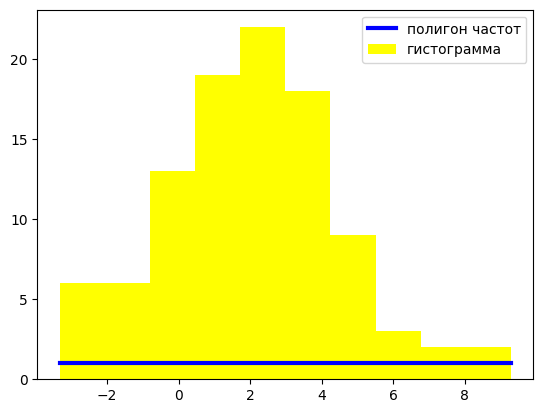

In [21]:
plt.figure()
plt.plot(variants, freq, color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(normal, 10, color = 'yellow', label = 'гистограмма')
plt.legend()
plt.show()